In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0, delimiter=',', encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
df = df[['T5','T6','NGONNGU']]
df

,T5,T6,NGONNGU
0,7.4,6.9,3.25
1,3.0,4.0,6.00
2,4.8,5.7,5.00
3,6.1,7.4,4.25
4,6.8,8.0,4.25
...,...,...,...
95,7.9,6.6,5.25
96,5.5,5.7,5.25
97,9.0,8.5,7.00
98,4.1,4.3,5.00


In [4]:
x = df[['T5','T6']].values
y = df[['NGONNGU']].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=16)

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
print(model.intercept_)

[4.01205005]


In [8]:
print(model.coef_)

[[ 0.19517246 -0.23194661]]


<p>NGONNGU = 4.01205005 + 0.19517246*T5 - 0.23194661*T6   </p>

In [9]:
pickle.dump(model, open('model_linear_regression1.sav', 'wb'))

In [10]:
from sklearn import metrics

y_test_pred = model.predict(x_test)

print('Score or R-Squared: ', model.score(x_test, y_test))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared:  -0.07691460875153755
Mean Absolute Error:  1.1905472933346886
Mean Squared Error:  1.987412256869439
Root Mean Squared Error:  1.4097560983622093
Mean Absolute Percentage Error:  0.3812386409968104


In [11]:
from sklearn import metrics

y_train_pred = model.predict(x_train)

print('Score or R-Squared: ', model.score(x_train, y_train))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_train, y_train_pred))

Score or R-Squared:  0.01846517069125675
Mean Absolute Error:  1.1471162639928523
Mean Squared Error:  2.0086861063975676
Root Mean Squared Error:  1.4172812375804484
Mean Absolute Percentage Error:  0.3941285255756851


<h4>Comment</h4><br><p>Score: T5, T6 giải thích 1,8%<br>Còn Lại sai số không đáng kể<p/>

<p>Cách 2: dùng scaterplot giữa actual và predict</p>

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

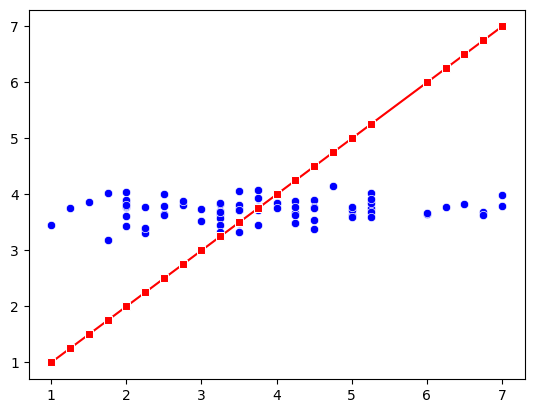

In [12]:
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), markers='o', color='b')

sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), marker='s', color='r')

plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

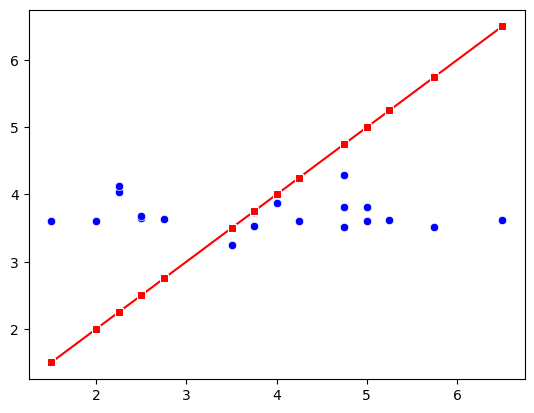

In [13]:
sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten(), markers='o', color='b')

sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), marker='s', color='r')

plt.show()

<p>Cách 3: dùng residual</p>

In [14]:
y_test_pred = model.predict(x_test)
dfe = pd.DataFrame(list(zip(x_test[:,0], x_test[:,1], 
                            y_test.flatten(),
                            y_test_pred.flatten())),
                            columns=['T5_test', 'T6_test', 'y_test', 'y_test_predicted'])
dfe['Residual'] = dfe['y_test'] - dfe['y_test_predicted']
dfe

,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


In [15]:
y_train_pred = model.predict(x_train)
dfe1 = pd.DataFrame(list(zip(x_train[:,0], x_train[:,1], 
                            y_train.flatten(),
                            y_train_pred.flatten())),
                            columns=['T5_train', 'T6_train', 'y_train', 'y_train_predicted'])
dfe1['Residual'] = dfe1['y_train'] - dfe1['y_train_predicted']
dfe1

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

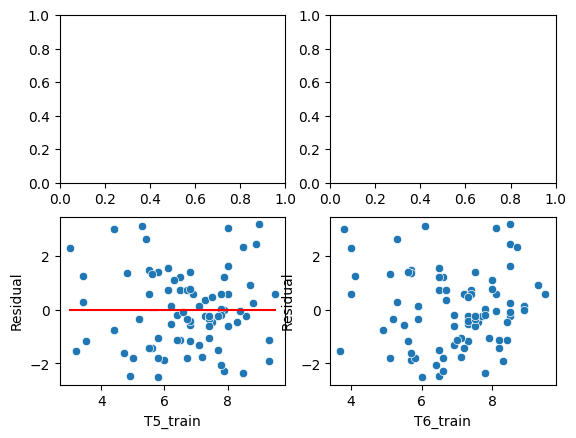

In [21]:
fig1, axes1 = plt.subplots(2, 2)
sns.scatterplot(data=dfe1, x='T5_train', y='Residual', ax=axes1[1, 0])
sns.lineplot(data=dfe1, x='T5_train', y=[0]*len(dfe1),
             color='r', ax=axes1[1, 0])

sns.scatterplot(data=dfe1, x='T6_train', y='Residual', ax=axes1[1, 1])


plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

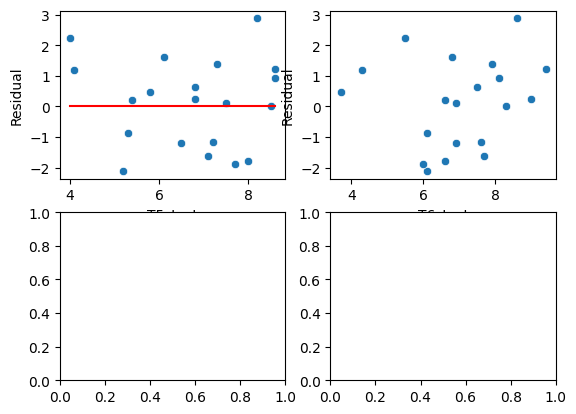

In [19]:
fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=dfe, x='T5_test', y='Residual', ax=axes[0, 0])
sns.lineplot(data=dfe, x='T5_test', y=[0]*len(dfe),
             color='r', ax=axes[0, 0])

sns.scatterplot(data=dfe, x='T6_test', y='Residual', ax=axes[0, 1])
plt.show()

<p>Cách 4: dùng histogram</p>

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

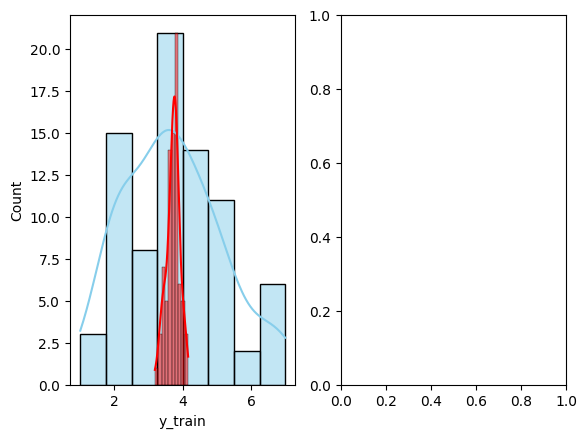

In [ ]:
fig, axes = plt.subplots(1,2)

sns.histplot(data=dfe, x='y_train', color= 'skyblue',
             label = 'Actual', kde=True, ax=axes[0])
sns.histplot(data=dfe, x='y_train_predicted', color='red',
             label='Forecast', kde=True, ax=axes[0])
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

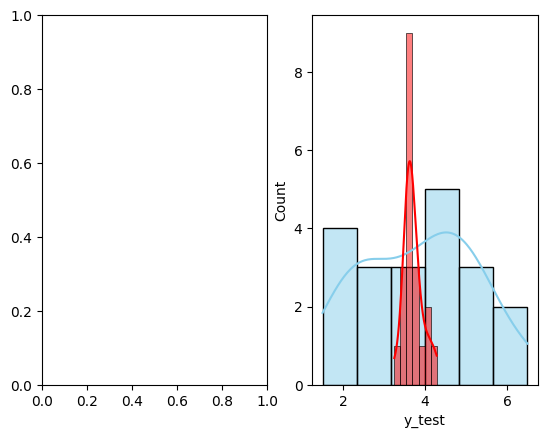

In [17]:
fig1, axes1 = plt.subplots(1,2)

sns.histplot(data=dfe, x='y_test', color= 'skyblue',
             label = 'Actual', kde=True, ax=axes1[1])
sns.histplot(data=dfe, x='y_test_predicted', color='red',
             label='Forecast', kde=True, ax=axes1[1])
plt.show()

<p>Fiting, overfitting và Underfitting trong mô hình học máy</p><br>
<p>Bias cao: không tốt(underfitting)</p><br>
<p>Bias thấp: <br>Tiêu cực(overfitting, variance cao)(học hết, không suy diễn ra được)<br>Tích cực(bias thấp, variance thấp)(học ít, rút ra được giá trị cốt lõi, )</p>
